In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
#paramètres
m = 1000           # kg, masse véhicule
g = 9.81           # gravité
rhoCD=0.30       # 0.5.rho.CD=...
A_f = 1.8          # m², surface frontale 
eta_T = 0.95       # rendement transmission 
distance_km = 7.2
Pe = 75  # kW

diesel_ratio = 0.3960
essence_ratio = 0.6040


params = {
    "diesel": {"eta0": 0.40, "HL": 36e6},
    "essence": {"eta0": 0.30, "HL": 32e6}
}

In [97]:
# Configuration du style
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 11,
    'axes.linewidth': 0.8,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'figure.facecolor': 'white'
})

# Couleurs cohérentes
colors = {'Février 2024': '#e74c3c', 'Février 2025': '#3498db', 
          'Avril 2024': '#e67e22', 'Avril 2025': '#2ecc71'}

In [98]:
# Données
data_fev25 = pd.DataFrame({
    "heure": list(range(24)),
    "vitesse": [54.2, 56.2, 55.4, 55.3, 56.7, 56.9, 53.2, 40.9, 29.6, 29.1, 36.5, 42.5,
                40.5, 41.7, 40.8, 38.0, 33.2, 27.2, 27.1, 31.2, 40.4, 48.7, 50.4, 51.0],
    "debit": [3759, 2357, 1683, 1463, 2060, 3844, 7946, 10053, 9848, 9645, 9686, 9967,
              10108, 10057, 10111, 9904, 9632, 9206, 9187, 9478, 8722, 7073, 6247, 5920],
    "mois": "Février 2025"
})

data_fev24 = pd.DataFrame({
    "heure": list(range(24)),
    "vitesse": [62.6, 68.1, 68.3, 67.7, 67.8, 68.3, 64.9, 48.1, 32.2, 31.2, 42.0, 46.5,
                45.4, 40.8, 40.9, 36.3, 32.0, 27.2, 26.0, 30.2, 38.6, 58.2, 59.4, 60.6],
    "debit": [4197, 2595, 1813, 1565, 2214, 4334, 8775, 10642, 10292, 10190, 10241, 10495,
              10518, 10284, 10261, 9904, 9632, 9375, 9407, 9878, 9562, 7843, 6863, 6376],
    "mois": "Février 2024"
})

data_avril25 = pd.DataFrame({
    "heure": list(range(24)),
    "vitesse": [51.4, 55.9, 57.1, 57.4, 58.4, 58.3, 53.8, 39.0, 28.6, 28.4, 37.5, 39.1,
                37.6, 35.7, 36.1, 33.5, 29.8, 25.4, 24.4, 27.0, 35.6, 46.7, 47.7, 48.4],
    "debit": [4440, 2723, 1871, 1565, 2105, 3904, 8043, 9844, 9590, 9471, 9518, 9788,
              9976, 9920, 9890, 9758, 9391, 9027, 8989, 9373, 9062, 7537, 6474, 6447],
    "mois": "Avril 2025"
})

data_avril24 = pd.DataFrame({
    "heure": list(range(24)),
    "vitesse": [63.3, 67.2, 68.7, 69.8, 70.2, 70.2, 65.1, 45.2, 32.7, 33.0, 41.5, 43.5,
                42.1, 38.5, 40.0, 38.1, 32.7, 28.3, 28.7, 32.7, 42.9, 59.3, 60.8, 60.9],
    "debit": [4911, 2965, 1871, 1565, 2179, 4322, 8791, 10481, 10264, 10057, 10013, 10245,
              10528, 10257, 10294, 10213, 9828, 9550, 9663, 10113, 9307, 7599, 6863, 6605],
    "mois": "Avril 2024"
})

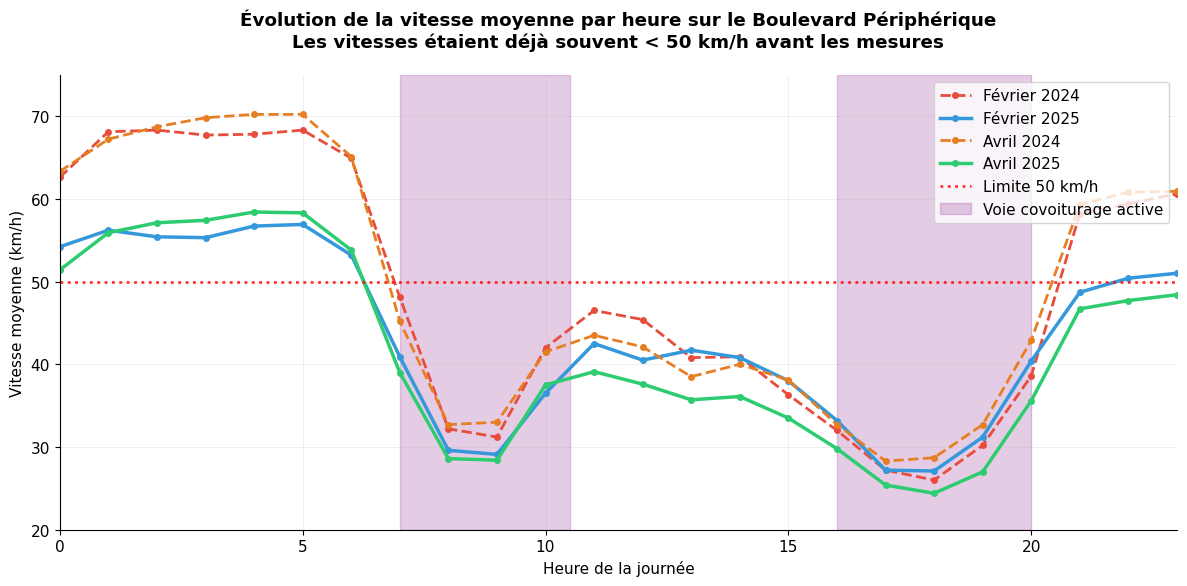

In [99]:
# ======== GRAPHIQUE 1: VITESSES PAR HEURE ========
plt.figure(figsize=(12, 6))

for data, label in [(data_fev24, 'Février 2024'), (data_fev25, 'Février 2025'),
                    (data_avril24, 'Avril 2024'), (data_avril25, 'Avril 2025')]:
    linestyle = '--' if '2024' in label else '-'
    linewidth = 2 if '2024' in label else 2.5
    plt.plot(data['heure'], data['vitesse'], color=colors[label], 
             label=label, linestyle=linestyle, linewidth=linewidth, marker='o', markersize=4)

# Ligne de référence à 50 km/h
plt.axhline(y=50, color='red', linestyle=':', linewidth=2, alpha=0.8, label='Limite 50 km/h')

# Ajout des zones d'activation de la voie de covoiturage
plt.axvspan(7, 10.5, alpha=0.2, color='purple', label='Voie covoiturage active')
plt.axvspan(16, 20, alpha=0.2, color='purple')

plt.xlabel('Heure de la journée')
plt.ylabel('Vitesse moyenne (km/h)')
plt.title('Évolution de la vitesse moyenne par heure sur le Boulevard Périphérique\nLes vitesses étaient déjà souvent < 50 km/h avant les mesures', 
          fontweight='bold', pad=20)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xlim(0, 23)
plt.ylim(20, 75)
plt.tight_layout()
plt.show()

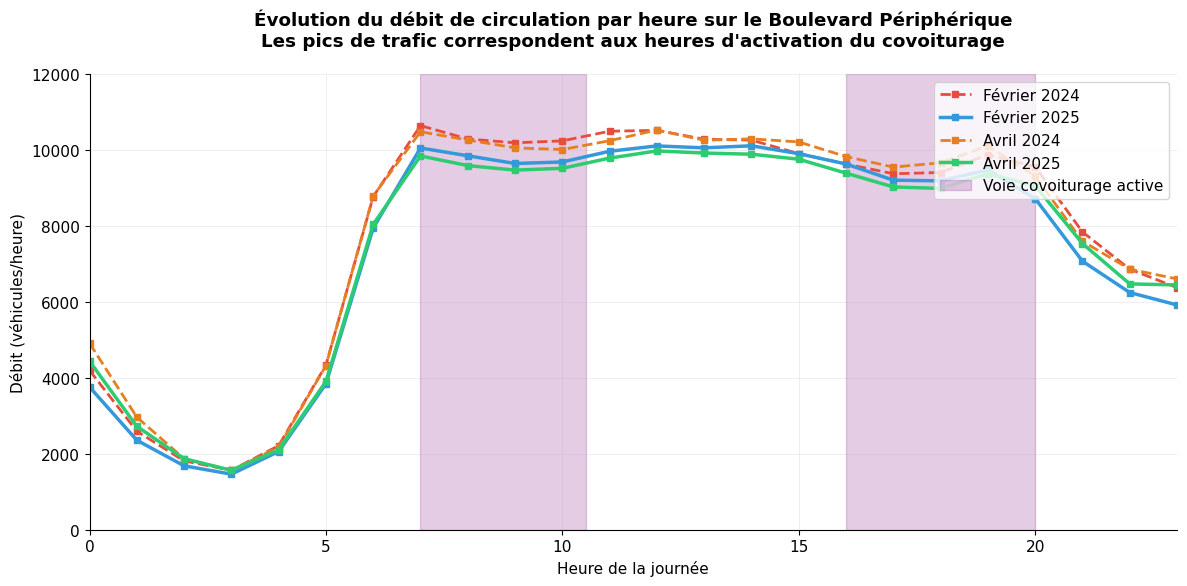

In [100]:
# ======== GRAPHIQUE 2: DÉBITS PAR HEURE ========
plt.figure(figsize=(12, 6))

for data, label in [(data_fev24, 'Février 2024'), (data_fev25, 'Février 2025'),
                    (data_avril24, 'Avril 2024'), (data_avril25, 'Avril 2025')]:
    linestyle = '--' if '2024' in label else '-'
    linewidth = 2 if '2024' in label else 2.5
    plt.plot(data['heure'], data['debit'], color=colors[label], 
             label=label, linestyle=linestyle, linewidth=linewidth, marker='s', markersize=4)

# Ajout des zones d'activation de la voie de covoiturage
plt.axvspan(7, 10.5, alpha=0.2, color='purple', label='Voie covoiturage active')
plt.axvspan(16, 20, alpha=0.2, color='purple')

plt.xlabel('Heure de la journée')
plt.ylabel('Débit (véhicules/heure)')
plt.title('Évolution du débit de circulation par heure sur le Boulevard Périphérique\nLes pics de trafic correspondent aux heures d\'activation du covoiturage', 
          fontweight='bold', pad=20)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xlim(0, 23)
plt.ylim(0, 12000)
plt.tight_layout()
plt.show()

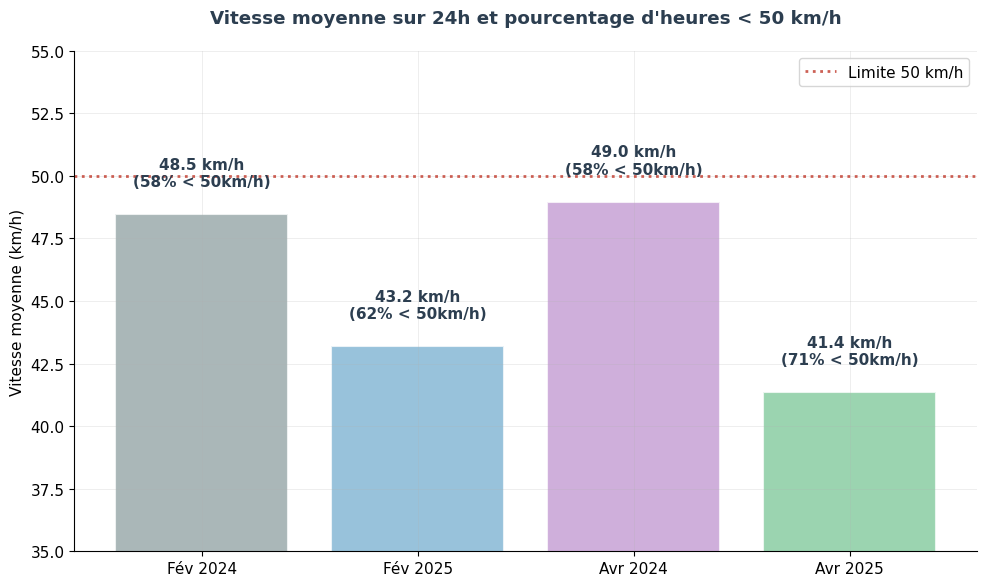

In [101]:
# ======== GRAPHIQUE 3: MOYENNES ET POURCENTAGES (COULEURS DOUCES) ========
plt.figure(figsize=(10, 6))

# Calcul des vitesses moyennes sur 24h
periods = []
vitesses_moyennes = []
sous_50_pct = []

for data, label in [(data_fev24, 'Fév 2024'), (data_fev25, 'Fév 2025'),
                    (data_avril24, 'Avr 2024'), (data_avril25, 'Avr 2025')]:
    # Vitesse moyenne sur 24h
    vitesse_moyenne = data['vitesse'].mean()
    # Pourcentage d'heures sous 50 km/h sur 24h
    heures_sous_50 = len(data[data['vitesse'] < 50])
    pct_sous_50 = (heures_sous_50 / 24) * 100  # 24 heures
    
    periods.append(label)
    vitesses_moyennes.append(vitesse_moyenne)
    sous_50_pct.append(pct_sous_50)

# Couleurs plus douces et moins contrastées
couleurs_douces = ['#95a5a6', '#7fb3d3', '#c39bd3', '#82ca9d']

bars = plt.bar(periods, vitesses_moyennes, color=couleurs_douces, 
               alpha=0.8, edgecolor='white', linewidth=1.5)

# Ligne de référence à 50 km/h
plt.axhline(y=50, color='#c0392b', linestyle=':', linewidth=2, alpha=0.8, label='Limite 50 km/h')

# Ajout des valeurs sur les barres
for bar, vitesse, pct in zip(bars, vitesses_moyennes, sous_50_pct):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{vitesse:.1f} km/h\n({pct:.0f}% < 50km/h)',
             ha='center', va='bottom', fontweight='bold', fontsize=11, color='#2c3e50')

plt.ylabel('Vitesse moyenne (km/h)')
plt.title('Vitesse moyenne sur 24h et pourcentage d\'heures < 50 km/h', 
          fontweight='bold', pad=20, color='#2c3e50')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(35, 55)
plt.tight_layout()
plt.show()

In [102]:
# Calculs statistiques complémentaires
print("=== ANALYSE STATISTIQUE ===")
print("\n1. Pourcentage d'heures avec vitesse < 50 km/h:")
for data, label in [(data_fev24, 'Février 2024'), (data_fev25, 'Février 2025'),
                    (data_avril24, 'Avril 2024'), (data_avril25, 'Avril 2025')]:
    heures_sous_50 = len(data[data['vitesse'] < 50])
    pct_sous_50 = (heures_sous_50 / 24) * 100
    print(f"{label}: {pct_sous_50:.1f}% ({heures_sous_50}/24 heures)")

print("\n2. Vitesse moyenne sur 24h:")
for data, label in [(data_fev24, 'Février 2024'), (data_fev25, 'Février 2025'),
                    (data_avril24, 'Avril 2024'), (data_avril25, 'Avril 2025')]:
    vitesse_moyenne = data['vitesse'].mean()
    print(f"{label}: {vitesse_moyenne:.1f} km/h")

print("\n3. Heures de pointe (vitesse minimale):")
for data, label in [(data_fev24, 'Février 2024'), (data_fev25, 'Février 2025'),
                    (data_avril24, 'Avril 2024'), (data_avril25, 'Avril 2025')]:
    min_speed_idx = data['vitesse'].idxmin()
    min_speed = data.loc[min_speed_idx, 'vitesse']
    min_hour = data.loc[min_speed_idx, 'heure']
    print(f"{label}: {min_speed:.1f} km/h à {min_hour}h")

print("\n4. Débit maximum:")
for data, label in [(data_fev24, 'Février 2024'), (data_fev25, 'Février 2025'),
                    (data_avril24, 'Avril 2024'), (data_avril25, 'Avril 2025')]:
    max_debit_idx = data['debit'].idxmax()
    max_debit = data.loc[max_debit_idx, 'debit']
    max_hour = data.loc[max_debit_idx, 'heure']
    print(f"{label}: {max_debit:,} véh/h à {max_hour}h")

=== ANALYSE STATISTIQUE ===

1. Pourcentage d'heures avec vitesse < 50 km/h:
Février 2024: 58.3% (14/24 heures)
Février 2025: 62.5% (15/24 heures)
Avril 2024: 58.3% (14/24 heures)
Avril 2025: 70.8% (17/24 heures)

2. Vitesse moyenne sur 24h:
Février 2024: 48.5 km/h
Février 2025: 43.2 km/h
Avril 2024: 49.0 km/h
Avril 2025: 41.4 km/h

3. Heures de pointe (vitesse minimale):
Février 2024: 26.0 km/h à 18h
Février 2025: 27.1 km/h à 18h
Avril 2024: 28.3 km/h à 17h
Avril 2025: 24.4 km/h à 18h

4. Débit maximum:
Février 2024: 10,642 véh/h à 7h
Février 2025: 10,111 véh/h à 14h
Avril 2024: 10,528 véh/h à 12h
Avril 2025: 9,976 véh/h à 12h


In [103]:
def mu_P_essence(x):
    return 0.234+ 1.0592 * x  + 0.8149 * x**2- 1.2121 * x**3 

def mu_P_diesel(x):
    return 0.5968- 0.1666 * x + 2.4968 * x**2 - 2.1128 * x**3 
def mu_n(x):
    """Coefficient mu_n, dépendant aussi de Pi/Pe selon approximation Table 1"""
    return 0.7107 + 0.9963 * x - 1.0582 * x**2 + 0.3124 * x**3

def conso_l_km_dyn_muP(v_kmh, eta0, HL, Pe, fuel_type):
    v = v_kmh * 1000 / 3600  # m/s
    f_r = 0.0136 + 0.4e-7 * v**2
    P_rl = m * g * f_r * v
    P_w = rhoCD * A_f * v**3
    P_i = (P_rl + P_w) / eta_T
    
    Pi_Pe = P_i / (Pe * 1000)  # Pe en kW → W
    Pi_Pe = np.clip(Pi_Pe, 0, 1)  # éviter dépassement hors plage
    muN = mu_n(Pi_Pe)
    if fuel_type == "essence":
        mu_P = mu_P_essence(Pi_Pe)
    else:
        mu_P = mu_P_diesel(Pi_Pe)

    eta = eta0 * mu_P * muN
    t = 1000 / v
    E = P_i * t / eta
    return E / HL

# PM10 ET PM2.5
def speed_correction(v):
    if v < 40:
        return 1.39
    elif v <= 90:
        return -0.00974 * v + 1.78
    else:
        return 0.902
def brake_speed_correction(v):
    if v < 40:
        return 1.67
    elif v <= 95:
        return -0.0270 * v + 2.75
    else:
        return 0.185

# Réimportation nécessaire après reset
def complete_calculations(df):
    df = df.copy()

    # Calcul du temps de parcours et du nombre de véhicules
    # Correction du débit pour refléter le nombre de véhicules distincts par heure
    df["nb_voitures"] = df["debit"] * (35/7.1)


    # Application du modèle de consommation pour chaque carburant
    for fuel in ["diesel", "essence"]:
        eta0 = params[fuel]["eta0"]
        HL = params[fuel]["HL"]
        df[f"conso_{fuel}"] = df["vitesse"].apply(
            lambda v: conso_l_km_dyn_muP(v, eta0, HL, Pe, fuel)
        )
        # Consommation en litres par heure = conso (L/km) * nb_voitures * distance
        df[f"{fuel}_litres"] = df[f"conso_{fuel}"] * df["nb_voitures"] * distance_km

    # PM non-exhaust
    EF_tsp_tyre = 0.0107
    EF_tsp_brake = 0.0122
    EF_tsp_road = 0.0150
    PM10_frac = 0.6
    PM2_5_frac = 0.42

    df["Sr_v"] = df["vitesse"].apply(speed_correction)
    df["Sr_brake"] = df["vitesse"].apply(brake_speed_correction)

    df["PM10_tyre"] = df["Sr_v"] * EF_tsp_tyre * PM10_frac * df["nb_voitures"] * distance_km
    df["PM10_road"] = EF_tsp_road * PM10_frac * df["nb_voitures"] * distance_km
    df["PM2.5_tyre"] = df["Sr_v"] * EF_tsp_tyre * PM2_5_frac * df["nb_voitures"] * distance_km
    df["PM2.5_road"] = EF_tsp_road * PM2_5_frac * df["nb_voitures"] * distance_km

    df["PM10_brake"] = df["Sr_brake"] * EF_tsp_brake * PM10_frac * df["nb_voitures"] * distance_km
    df["PM2.5_brake"] = df["Sr_brake"] * EF_tsp_brake * PM2_5_frac * df["nb_voitures"] * distance_km


    df["PM10_non_exhaust"] = df["PM10_tyre"] + df["PM10_brake"] + df["PM10_road"]
    df["PM2.5_non_exhaust"] = df["PM2.5_tyre"] + df["PM2.5_brake"] + df["PM2.5_road"]

    # PM exhaust — Facteurs d'émission (mg/km)
    EF_PM10 = {"diesel": 79.77, "essence": 26.26}
    EF_PM2_5 = {"diesel": 57.8, "essence": 1.57}

    df["PM10_exhaust"] = (
        EF_PM10["diesel"] * df["nb_voitures"] * diesel_ratio +
        EF_PM10["essence"] * df["nb_voitures"] * essence_ratio
    ) * distance_km / 1000  # mg → g

    df["PM2.5_exhaust"] = (
        EF_PM2_5["diesel"] * df["nb_voitures"] * diesel_ratio +
        EF_PM2_5["essence"] * df["nb_voitures"] * essence_ratio
    ) * distance_km / 1000  # mg → g

    # Total PM
    df["PM10_total"] = df["PM10_non_exhaust"] + df["PM10_exhaust"]
    df["PM2.5_total"] = df["PM2.5_non_exhaust"] + df["PM2.5_exhaust"]

    return df


df_all = pd.concat([
    complete_calculations(data_fev24),
    complete_calculations(data_fev25),
    complete_calculations(data_avril24),
    complete_calculations(data_avril25)
]).reset_index(drop=True)


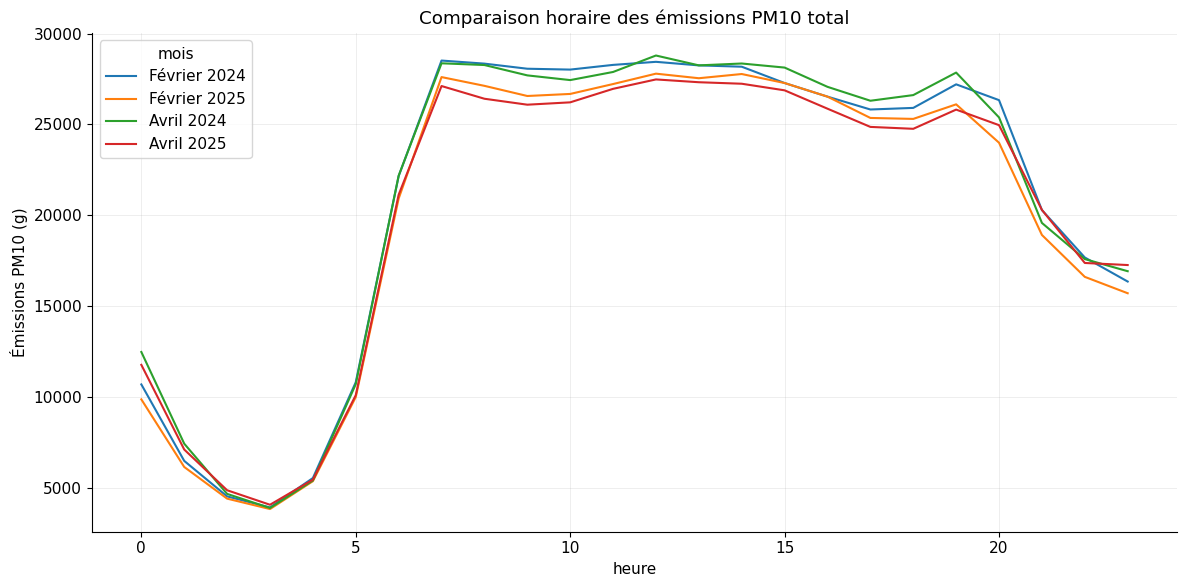

In [104]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_all, x="heure", y="PM10_total", hue="mois")
plt.title("Comparaison horaire des émissions PM10 total")
plt.ylabel("Émissions PM10 (g)")
plt.grid(True)
plt.tight_layout()
plt.show()

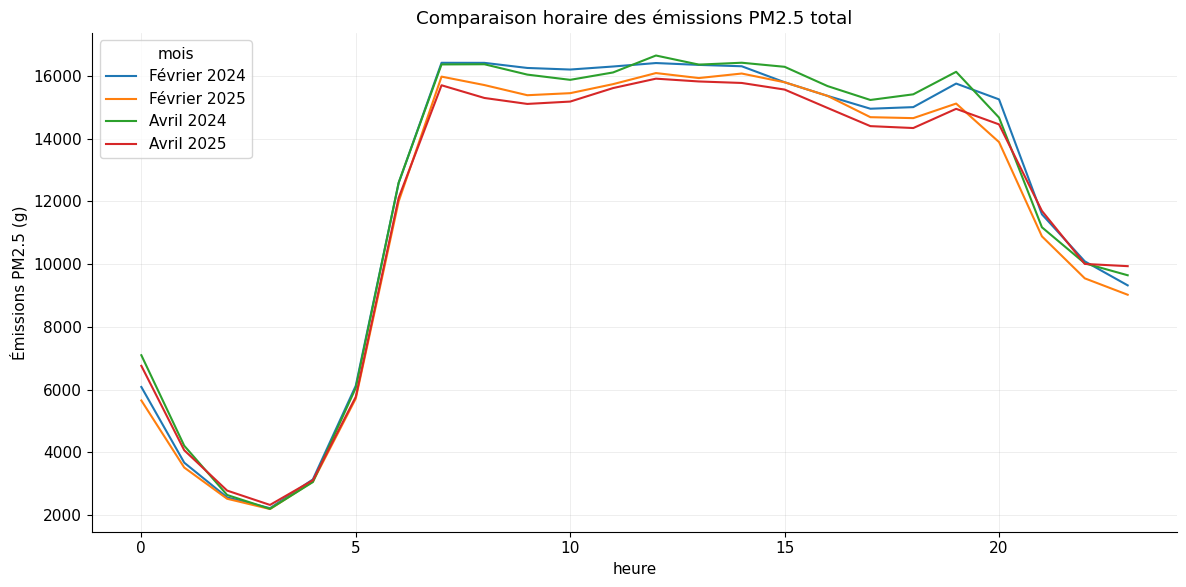

In [105]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_all, x="heure", y="PM2.5_total", hue="mois")
plt.title("Comparaison horaire des émissions PM2.5 total")
plt.ylabel("Émissions PM2.5 (g)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [106]:
df_all.head()

,heure,vitesse,debit,mois,nb_voitures,conso_diesel,diesel_litres,conso_essence,essence_litres,Sr_v,...,PM2.5_tyre,PM2.5_road,PM10_brake,PM2.5_brake,PM10_non_exhaust,PM2.5_non_exhaust,PM10_exhaust,PM2.5_exhaust,PM10_total,PM2.5_total
0,0,62.6,4197,Février 2024,20689.436620,0.046746,6963.395990,0.133091,19825.696283,1.170276,...,783.434203,938.472845,1155.622948,808.936064,3615.490160,2530.843112,7068.333168,3550.865442,10683.823328,6081.708554
1,1,68.1,2595,Février 2024,12792.253521,0.050457,4647.280771,0.137039,12621.887197,1.116706,...,462.222915,580.256620,614.401130,430.080791,2103.657608,1472.560325,4370.341809,2195.495788,6473.999416,3668.056113
2,2,68.3,1813,Février 2024,8937.323944,0.050593,3255.579467,0.137166,8826.434493,1.114758,...,322.369289,405.397014,426.708542,298.695979,1466.374690,1026.462283,3053.344778,1533.885882,4519.719468,2560.348165
3,3,67.7,1565,Février 2024,7714.788732,0.050185,2787.594417,0.136783,7597.787225,1.120602,...,279.731256,349.942817,374.926068,262.448247,1274.460458,892.122320,2635.678201,1324.065861,3910.138658,2216.188181
4,4,67.8,2214,Février 2024,10914.084507,0.050253,3948.939522,0.136847,10753.641752,1.119628,...,395.390862,495.062873,528.853508,370.197455,1800.930272,1260.651190,3728.684688,1873.151320,5529.614959,3133.802510


In [107]:
# Compilation dans un dictionnaire
datasets = {
    "Février 2024": data_fev24,
    "Février 2025": data_fev25,
    "Avril 2024": data_avril24,
    "Avril 2025": data_avril25
}

# Facteurs d'émission par litre (en g)
facteurs_emission = {
    "CO2": {"diesel": 2612, "essence": 2019},  # en g/L #modifier trop bizarre les valeurs 
    "NOx": {"diesel": 11, "essence": 13}   # en mg/L → converti en g/L
}

# Résultats finaux
resultats = []

for nom_mois, df in datasets.items():
    df_calc = complete_calculations(df)
    diesel_total = df_calc["diesel_litres"].sum()
    essence_total = df_calc["essence_litres"].sum()
    total_litres = diesel_total + essence_total

    # Nombre total de voitures
    df["nb_voitures"] = df["debit"] * (35/7.1)
    total_voitures = df_calc["nb_voitures"].sum()

    # Emissions CO2 et NOx (en kg)

    CO2_total = (diesel_total * facteurs_emission["CO2"]["diesel"] +
                 essence_total * facteurs_emission["CO2"]["essence"]) / 1000

    NOx_total = (diesel_total * facteurs_emission["NOx"]["diesel"] +
                 essence_total * facteurs_emission["NOx"]["essence"]) / 1000
    PM10_total = df_calc["PM10_total"].sum()
    PM25_total = df_calc["PM2.5_total"].sum()

    resultats.append({
        "mois": nom_mois,
        "diesel_litres": diesel_total,
        "essence_litres": essence_total,
        "total_litres": total_litres,
        "nb_voitures": total_voitures,
        "CO2_total_kg": CO2_total,
        "NOx_total_kg": NOx_total,
        "PM10_total_g": PM10_total,
        "PM2.5_total_g": PM25_total
    })

# Résumé en DataFrame
df_resultats = pd.DataFrame(resultats)

In [108]:
df_resultats.head()

,mois,diesel_litres,essence_litres,total_litres,nb_voitures,CO2_total_kg,NOx_total_kg,PM10_total_g,PM2.5_total_g
0,Février 2024,238291.026269,758879.600909,9.971706e+05,923092.957746,2.154594e+06,12486.636101,503544.998124,290153.503028
1,Février 2025,211727.326742,698093.982215,9.098213e+05,877247.887324,1.962484e+06,11404.222363,484561.310981,279960.418886
2,Avril 2024,240825.221034,765432.193029,1.006257e+06,929146.478873,2.174443e+06,12599.695941,507178.196836,292288.003402
3,Avril 2025,206401.145584,687143.924720,8.935451e+05,880945.070423,1.926463e+06,11203.283623,487310.936072,281635.519606


8.916322083608524


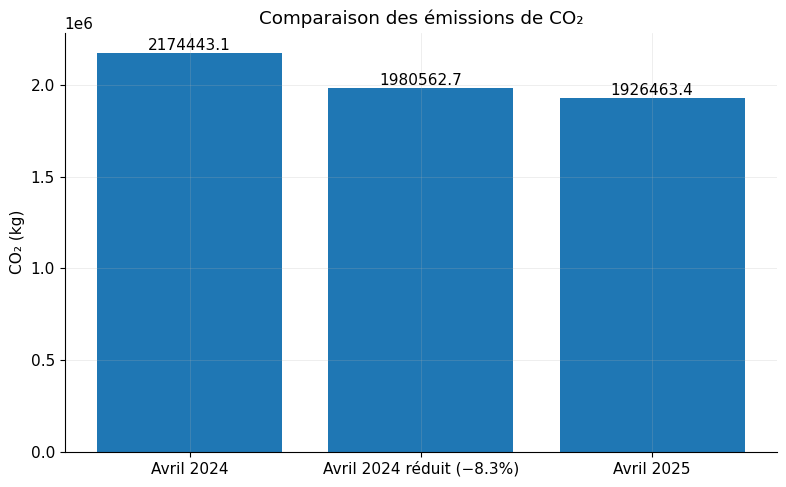

In [109]:
fev24 = df_resultats[df_resultats["mois"] == "Février 2024"].iloc[0]
fev25 = df_resultats[df_resultats["mois"] == "Février 2025"].iloc[0]
avr24 = df_resultats[df_resultats["mois"] == "Avril 2024"].iloc[0]
avr25 = df_resultats[df_resultats["mois"] == "Avril 2025"].iloc[0]

# Calcul du pourcentage de réduction entre février 2024 et février 2025
reduction_fev = 100 * (fev24["CO2_total_kg"] - fev25["CO2_total_kg"]) / fev24["CO2_total_kg"]
print(reduction_fev)

avr24_reduit = avr24["CO2_total_kg"] * (1 - reduction_fev / 100)

# Construction du DataFrame pour le graphique
df_graph = pd.DataFrame({
    "Type": ["Avril 2024", "Avril 2024 réduit (−8.3%)", "Avril 2025"],
    "CO2 (kg)": [avr24["CO2_total_kg"], avr24_reduit, avr25["CO2_total_kg"]]
})

# Création du graphique
plt.figure(figsize=(8, 5))
bars = plt.bar(df_graph["Type"], df_graph["CO2 (kg)"])
plt.title("Comparaison des émissions de CO₂")
plt.ylabel("CO₂ (kg)")

# Affichage des valeurs sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, f'{yval:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Graphiques 


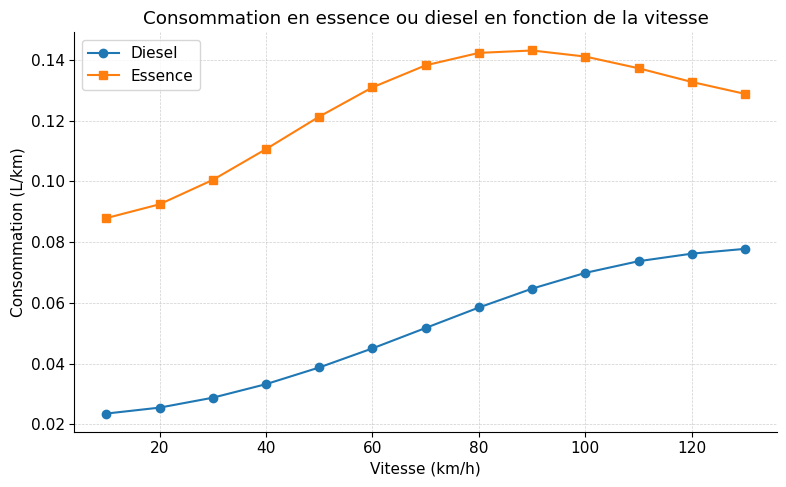

In [110]:
v_points = np.arange(10, 131, 10)
# Recalcul des consommations avec mu_P dynamique
conso_diesel_dyn = [conso_l_km_dyn_muP(v, params["diesel"]["eta0"],
                                       params["diesel"]["HL"], Pe, "diesel") for v in v_points]
conso_essence_dyn = [conso_l_km_dyn_muP(v, params["essence"]["eta0"],
                                        params["essence"]["HL"], Pe, "essence") for v in v_points]

# Nouveau graphique
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(v_points, conso_diesel_dyn, 'o-', label='Diesel', color='#1f77b4')
ax.plot(v_points, conso_essence_dyn, 's-', label='Essence', color='#ff7f0e')

ax.set_xlabel('Vitesse (km/h)')
ax.set_ylabel('Consommation (L/km)')
ax.set_title('Consommation en essence ou diesel en fonction de la vitesse')
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()

plt.tight_layout()
plt.show()

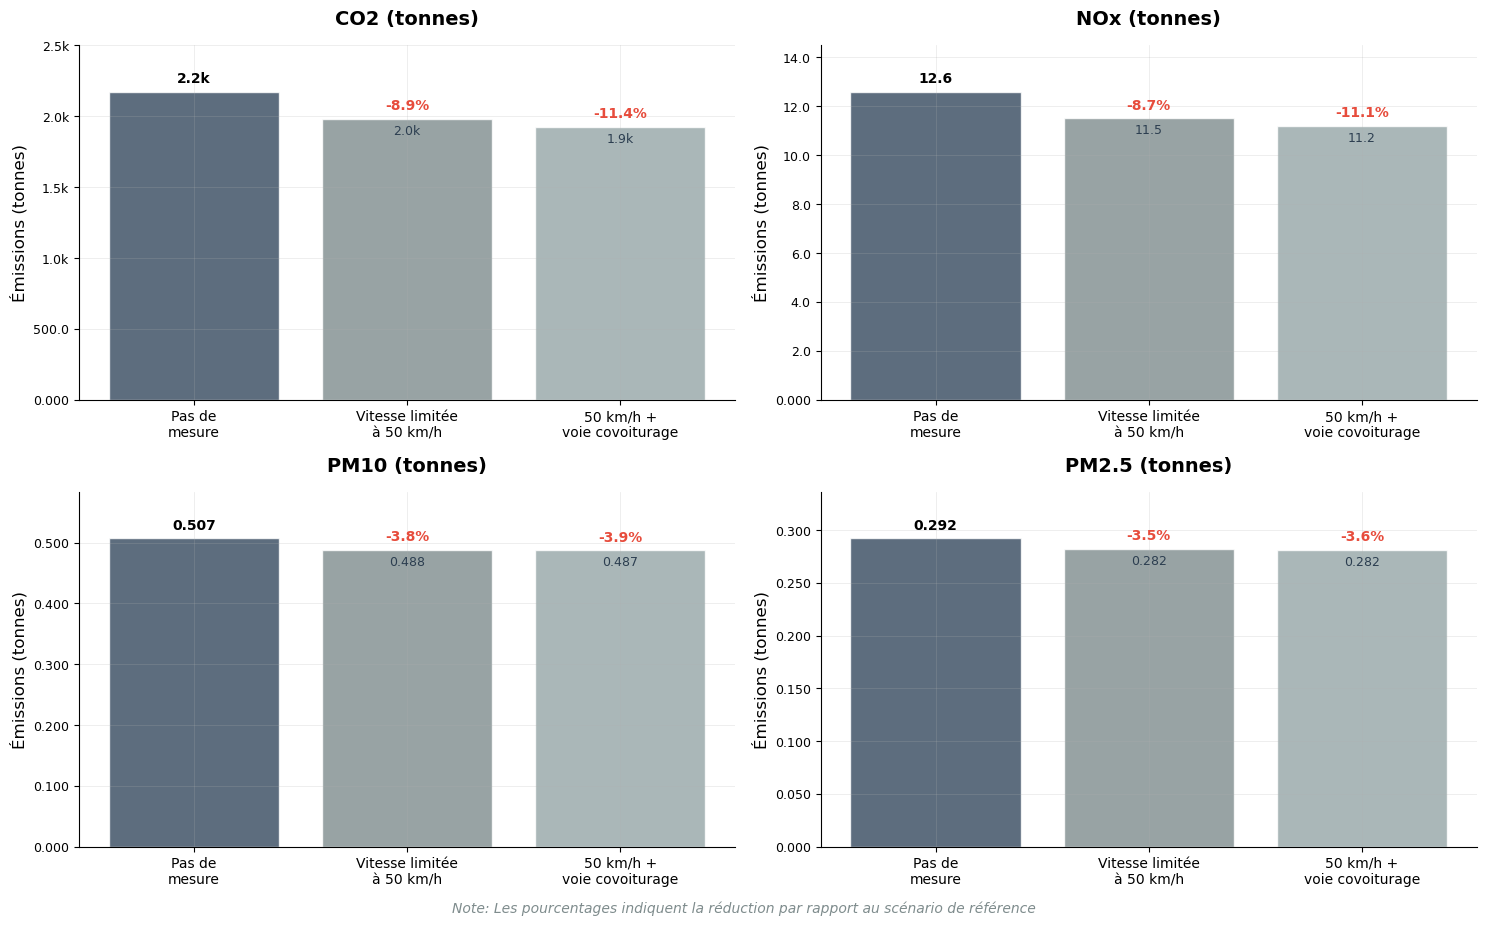

In [111]:
# Configuration du style général
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 11,
    'axes.linewidth': 0.8,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linewidth': 0.5
})

# Filtrage des lignes pour chaque mois
fev24 = df_resultats[df_resultats["mois"] == "Février 2024"].iloc[0]
fev25 = df_resultats[df_resultats["mois"] == "Février 2025"].iloc[0]
avr24 = df_resultats[df_resultats["mois"] == "Avril 2024"].iloc[0]
avr25 = df_resultats[df_resultats["mois"] == "Avril 2025"].iloc[0]

# Calcul des pourcentages de réduction entre février 2024 et février 2025
reduc_CO2 = (fev24["CO2_total_kg"] - fev25["CO2_total_kg"]) / fev24["CO2_total_kg"]
reduc_NOx = (fev24["NOx_total_kg"] - fev25["NOx_total_kg"]) / fev24["NOx_total_kg"]
reduc_PM10 = (fev24["PM10_total_g"] - fev25["PM10_total_g"]) / fev24["PM10_total_g"]
reduc_PM25 = (fev24["PM2.5_total_g"] - fev25["PM2.5_total_g"]) / fev24["PM2.5_total_g"]

# Calcul des valeurs réduites pour avril 2024 (converties en tonnes)
valeurs = {
    "CO2 (tonnes)": [avr24["CO2_total_kg"]/1000, (avr24["CO2_total_kg"] * (1 - reduc_CO2))/1000, avr25["CO2_total_kg"]/1000],
    "NOx (tonnes)": [avr24["NOx_total_kg"]/1000, (avr24["NOx_total_kg"] * (1 - reduc_NOx))/1000, avr25["NOx_total_kg"]/1000],
    "PM10 (tonnes)": [avr24["PM10_total_g"]/1000000, (avr24["PM10_total_g"] * (1 - reduc_PM10))/1000000, avr25["PM10_total_g"]/1000000],
    "PM2.5 (tonnes)": [avr24["PM2.5_total_g"]/1000000, (avr24["PM2.5_total_g"] * (1 - reduc_PM25))/1000000, avr25["PM2.5_total_g"]/1000000],
}

# Labels et couleurs améliorés (même couleur pour toutes les premières barres)
x_labels = ["Pas de\nmesure", "Vitesse limitée\nà 50 km/h", "50 km/h +\nvoie covoiturage"]
colors = ['#34495e', '#7f8c8d', '#95a5a6']  # Même palette pour tous les graphiques

# Création de la figure avec des proportions améliorées
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Fonction pour formater les valeurs en tonnes
def format_value(val, unit_type):
    # Toutes les valeurs sont maintenant en tonnes
    if val >= 1000:
        return f"{val/1000:.1f}k"
    elif val >= 1:
        return f"{val:.1f}"
    else:
        return f"{val:.3f}"

# Création des graphiques
for idx, (ax, (polluant, vals)) in enumerate(zip(axes.flat, valeurs.items())):
    # Création des barres avec dégradé de couleurs
    bars = ax.bar(x_labels, vals, color=colors, alpha=0.8, edgecolor='white', linewidth=1)
    
    # Titre et labels
    ax.set_title(polluant, fontsize=14, fontweight='bold', pad=15)
    ax.set_ylabel("Émissions (tonnes)", fontsize=12)
    
    # Ajout des valeurs et pourcentages sur les barres
    for i, (bar, val) in enumerate(zip(bars, vals)):
        height = bar.get_height()
        
        # Valeur formatée
        formatted_val = format_value(val, polluant)
        
        # Position du texte
        y_pos = height + 0.02 * max(vals)
        
        if i == 0:
            # Première barre : juste la valeur
            ax.text(bar.get_x() + bar.get_width()/2, y_pos, formatted_val,
                   ha='center', va='bottom', fontweight='bold', fontsize=10)
        else:
            # Autres barres : pourcentage de réduction + valeur
            pct_reduc = 100 * (vals[0] - val) / vals[0]
            ax.text(bar.get_x() + bar.get_width()/2, y_pos, f"-{pct_reduc:.1f}%",
                   ha='center', va='bottom', fontweight='bold', fontsize=10, color='#e74c3c')
            ax.text(bar.get_x() + bar.get_width()/2, y_pos - 0.08 * max(vals), formatted_val,
                   ha='center', va='bottom', fontsize=9, color='#2c3e50')
    
    # Amélioration de l'axe Y
    ax.set_ylim(0, max(vals) * 1.15)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format_value(x, polluant)))
    
    # Rotation des labels x si nécessaire
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=9)

# Ajustement de la mise en page
plt.tight_layout(rect=[0, 0.02, 1, 0.93])

# Ajout d'une note explicative
fig.text(0.5, 0.01, "Note: Les pourcentages indiquent la réduction par rapport au scénario de référence", 
         ha='center', fontsize=10, style='italic', color='#7f8c8d')

plt.show()

# Option alternative : graphique en barres groupées
def create_grouped_chart():
    """Version alternative avec barres groupées"""
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    
    # Préparation des données normalisées (en pourcentage de réduction)
    polluants = list(valeurs.keys())
    scenarios = x_labels
    
    # Calcul des réductions en pourcentage
    reductions = []
    for polluant, vals in valeurs.items():
        scenario_reductions = [0]  # Référence à 0%
        for val in vals[1:]:
            reduction = 100 * (vals[0] - val) / vals[0]
            scenario_reductions.append(reduction)
        reductions.append(scenario_reductions)
    
    # Position des barres
    x = np.arange(len(scenarios))
    width = 0.2
    multiplier = 0
    
    colors_alt = ['#3498db', '#e74c3c', '#f39c12', '#2ecc71']
    
    for i, (polluant, reduction_vals) in enumerate(zip(polluants, reductions)):
        offset = width * multiplier
        bars = ax.bar(x + offset, reduction_vals, width, label=polluant, 
                     color=colors_alt[i], alpha=0.8)
        
        # Ajout des valeurs sur les barres
        for bar, val in zip(bars, reduction_vals):
            if val > 0:
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                       f'{val:.1f}%', ha='center', va='bottom', fontsize=9)
        
        multiplier += 1
    
    ax.set_xlabel('Scénarios', fontsize=12)
    ax.set_ylabel('Réduction des émissions (%)', fontsize=12)
    ax.set_title('Comparaison des réductions d\'émissions par scénario', 
                fontsize=14, fontweight='bold')
    ax.set_xticks(x + width * 1.5)
    ax.set_xticklabels(scenarios)
    ax.legend(loc='upper left', frameon=True, shadow=True)
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Uncomment to show the alternative grouped chart:
# create_grouped_chart()

In [112]:
# Affichage des valeurs dans un tableau simple

print(f"{'Polluant':<12} | {'Pas de mesure':>15} | {'Vitesse 50':>15} | {'50 + Covoit.':>15}")
print("-" * 65)
for polluant, vals in valeurs.items():
    print(f"{polluant:<12} | {vals[0]:15,.2f} | {vals[1]:15,.2f} | {vals[2]:15,.2f}")


Polluant     |   Pas de mesure |      Vitesse 50 |    50 + Covoit.
-----------------------------------------------------------------
CO2 (tonnes) |        2,174.44 |        1,980.56 |        1,926.46
NOx (tonnes) |           12.60 |           11.51 |           11.20
PM10 (tonnes) |            0.51 |            0.49 |            0.49
PM2.5 (tonnes) |            0.29 |            0.28 |            0.28
